In [1]:
import os
from glob import glob
import numpy  as np
import gdal
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio
import sys
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()+"\\clipped_images\\"
scenes = glob(path+"*.tif")

In [3]:
toPath = os.getcwd() + '\\ndvi_images\\'
if not os.path.exists(toPath):
    os.makedirs(toPath)

In [4]:
def getBands(file_path):
    ds = gdal.Open(file_path)
    nir = np.array(ds.GetRasterBand(1).ReadAsArray()).astype(float)
    red = np.array(ds.GetRasterBand(2).ReadAsArray()).astype(float)
    green = np.array(ds.GetRasterBand(3).ReadAsArray()).astype(float)
    blue = np.array(ds.GetRasterBand(4).ReadAsArray()).astype(float)
    return red, blue, green, nir

In [5]:
def saveImage(src, savePath, arr):
    with rasterio.Env():
        profile = src.profile
        profile.update(
            dtype=rasterio.float64,
            count=1)
        with rasterio.open(savePath, 'w', **profile) as dst:
            dst.write(arr.astype(rasterio.float64), 1)

In [6]:
def hist(date, ndvi):
    ep.hist(ndvi,
            figsize=(12, 6),
            title=[date])
    plt.show()

In [7]:
def imMap(date, ndvi):
    ep.plot_bands(ndvi, 
        cmap='Spectral',
        scale=False,
        vmin=-1, vmax = 1,
        title=date)
    plt.show()

Krishna20190101.tif


C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Hello\.conda\envs\pro\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Hello\.conda\envs\pro\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


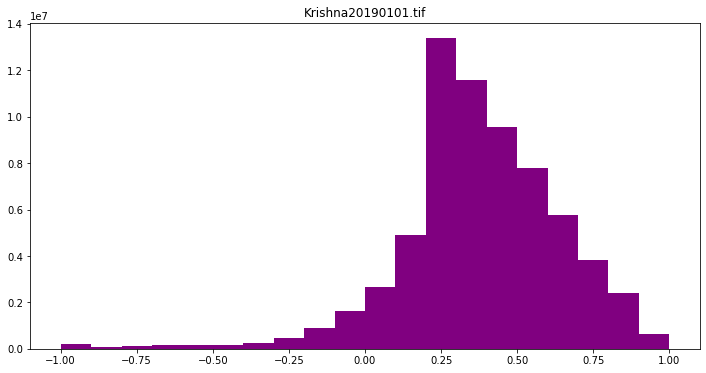

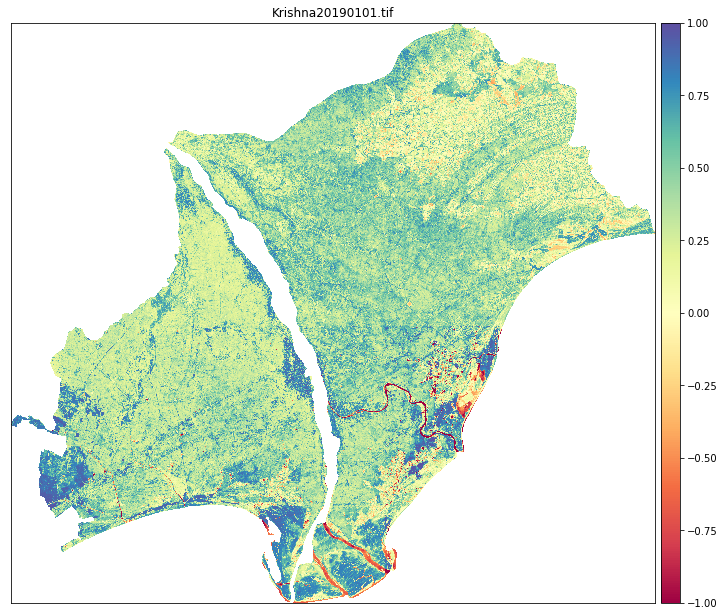

In [9]:
for scene in scenes:
    date = scene.split('\\')[-1]
    print(date)
    savePath = toPath + date
    red, blue, green, nir = getBands(scene)
    ndvi = ((nir-red)/(nir+red))
    hist(date, ndvi)
    imMap(date, ndvi)
    saveImage(rasterio.open(scene), savePath, ndvi)